#Required libraries

In [23]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

path = r"/content/drive/My Drive/final"

Mounted at /content/drive/


##data collection

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/final/news.csv')       #dataset of all news
df2 = pd.read_csv('/content/drive/MyDrive/final/Fake.csv')       #dataset of fake news
df3 = pd.read_csv('/content/drive/MyDrive/final/True.csv')       #dataset of true news

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
df1 = df1.drop(['Unnamed: 0','title'], axis=1)
df2 = df2.drop(['subject','title','date'], axis=1)
df3 = df3.drop(['subject','title','date'], axis=1)


In [8]:
df2['label'] = 0

In [9]:
df2

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [10]:
df3['label'] = 1

In [11]:
df3

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [12]:
def make_num(x):
    if x == 'FAKE':
        return 0
    else:
        return 1

In [13]:
df1.label = df1.label.apply(make_num)

In [14]:
df = pd.concat([df1, df2, df3])

In [15]:
df.shape

(51233, 2)

In [16]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


#Data visualization

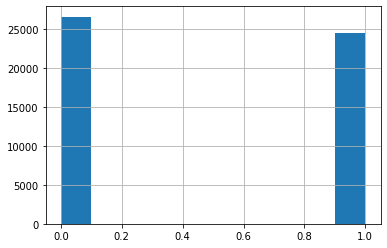

In [17]:
df.label.hist()

In [18]:
# create new feature
def num_of_word(x):
    arr = x.split(' ')
    return len(arr) 

In [19]:
df['num_of_word'] = df.text.apply(num_of_word)

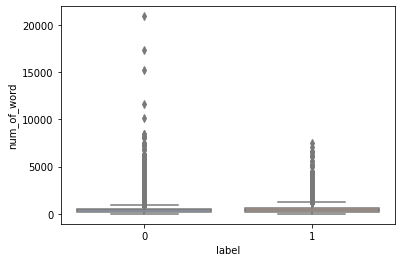

In [20]:
sns.boxplot(
    x="label", y="num_of_word", data=df, palette="coolwarm")

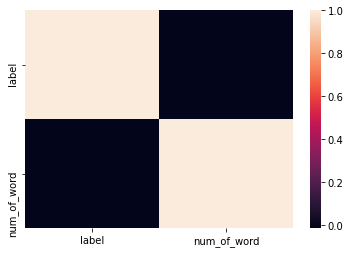

In [21]:
sns.heatmap(df.corr())

In [24]:
X_train,X_test,y_train,y_test=train_test_split(df.text, df.label, test_size=0.2, random_state=42)

In [25]:
X_train

8189     Proving once again that conservative  Christia...
7607     WASHINGTON (Reuters) - Democratic presidential...
9543     WASHINGTON (Reuters) - The Obama administratio...
15694    The Democrats didn t waste any time pushing fo...
13128    I was a die-hard Cruz supporter. I trusted him...
                               ...                        
4949     Donald Trump has his sights set on a voting bl...
14916    UNITED NATIONS (Reuters) - North Korea complai...
8342     WASHINGTON (Reuters) - Huma Abedin, one of Dem...
860      A man protests against international trade agr...
9460     Yesterday, former GOP Republican presidential ...
Name: text, Length: 40986, dtype: object